In [1]:
!pip install mtcnn

In [2]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: c:\users\51046811\anaconda3\envs\keras-tf\lib\site-packages
Requires: opencv-python, keras
Required-by: 


In [1]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
import os

from matplotlib.patches import Rectangle

from PIL import Image, UnidentifiedImageError

from numpy import asarray

import glob

import sys

from PIL.ExifTags import TAGS #Dicionario chave/descricao dos metadatas padroes das imagens de formato jpg 

import exif


0.1.0


In [2]:
#Definicao do repertorio home do projet
os.chdir("C:\\Users\\Utilisateur\\Downloads\\tmp\\FACES\\")
#os.chdir("G:\\Meu Drive\\tmp\\FACES\\")
#Parametros
sizeImg = 128

In [3]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    fig=ax.figure
    fig.set_size_inches((10,10))
    # show the plot
    pyplot.show()

In [4]:
# create the detector, using default weights
detector = MTCNN()

In [5]:
detector.min_face_size

20

{'box': [1040, 338, 167, 217], 'confidence': 0.9999910593032837, 'keypoints': {'left_eye': (1094, 435), 'right_eye': (1168, 431), 'nose': (1134, 481), 'mouth_left': (1105, 513), 'mouth_right': (1166, 511)}}
{'box': [2429, 0, 172, 228], 'confidence': 0.999985933303833, 'keypoints': {'left_eye': (2474, 92), 'right_eye': (2549, 77), 'nose': (2515, 121), 'mouth_left': (2494, 177), 'mouth_right': (2555, 167)}}
{'box': [2625, 317, 167, 236], 'confidence': 0.9999499320983887, 'keypoints': {'left_eye': (2672, 405), 'right_eye': (2746, 414), 'nose': (2703, 448), 'mouth_left': (2672, 494), 'mouth_right': (2731, 500)}}
{'box': [1337, 394, 180, 232], 'confidence': 0.9998372793197632, 'keypoints': {'left_eye': (1389, 490), 'right_eye': (1468, 484), 'nose': (1430, 540), 'mouth_left': (1399, 574), 'mouth_right': (1473, 569)}}
{'box': [3068, 281, 153, 222], 'confidence': 0.9998300075531006, 'keypoints': {'left_eye': (3109, 370), 'right_eye': (3180, 360), 'nose': (3152, 409), 'mouth_left': (3122, 450),

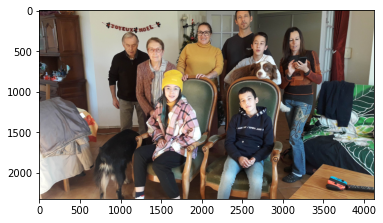

In [7]:
# Identificacao dos rostos de uma fotografia com o modelo MTCNN
# load image from file
filename = 'isalie-remi-damien-delphine-franck-maman-papa-3.jpg'
#filename = 'isalie-maman-1.jpg'
pixels = pyplot.imread(filename)
pyplot.imshow(pixels)
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)


In [6]:
type(faces)
len(faces)

12

In [7]:
pixels.shape

(2322, 4128, 3)

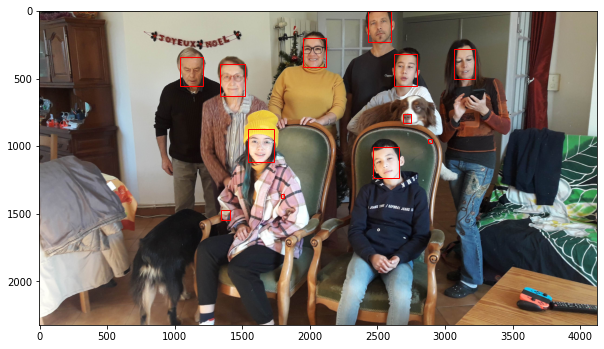

In [8]:
draw_image_with_boxes(filename, faces)

In [12]:
# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    print(type(data))
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        conf = round(faces[i]['confidence'], 3)
        titSubplot = f'Pb: {conf}'
        pyplot.subplot(1, len(result_list), i+1, title=titSubplot)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
        pyplot.gca().figure.set_size_inches((19,12))
    # show the plot
    pyplot.show()


<class 'numpy.ndarray'>


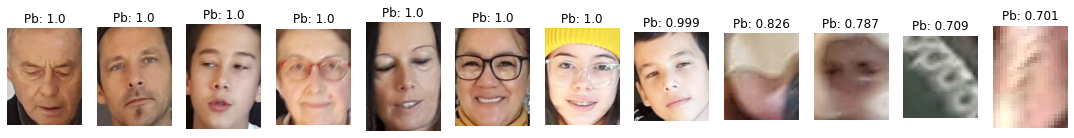

In [13]:
draw_faces(filename, faces)

In [14]:
round(faces[8]['confidence'], 3)

0.826

In [15]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to c:\users\utilis~1\appdata\local\temp\pip-req-build-qdagfsha


  Running command git clone -q https://github.com/rcmalli/keras-vggface.git 'C:\Users\UTILIS~1\AppData\Local\Temp\pip-req-build-qdagfsha'


In [16]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: c:\users\utilisateur\anaconda3\envs\keras-tf\lib\site-packages
Requires: h5py, numpy, pillow, six, keras, pyyaml, scipy
Required-by: 


In [17]:
# check version of keras_vggface
import keras_vggface
# print version
print(keras_vggface.__version__)


0.6


In [18]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

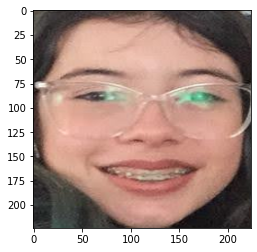

In [19]:
filename = 'isalie-remi-damien-delphine-franck-maman-papa-3.jpg'
filename = 'isalie-maman-1.jpg'
# load the photo and extract the face
pixels = extract_face(filename)
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()


In [22]:
type(pixels)
lst_face_array = list()
lst_face_array.append()

In [14]:
# extract the faces from a given photograph
def extract_faces(filename, required_size=(224, 224)):
    lst_face_array = list()
    # load image from file
    #pixels = pyplot.imread(filename)
    
    img = Image.open(filename)
    #Se a foto foi tirada como um retrato
    if exifs[274] == 6:
        #Rotacao de -90 graus para a foto estar no sentido paisagem, necessario para identificar os rostos
        img = img.rotate(-90)
        img.show()
    
    pixels = np.asarray(img)
    
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    for result in results:
        if result['confidence'] > 0.9:
            # extract the bounding box from the first face
            x1, y1, width, height = result['box']
            x2, y2 = x1 + width, y1 + height
            # extract the face
            face = pixels[y1:y2, x1:x2]
            # resize pixels to the model size
            image = Image.fromarray(face)
            image = image.resize(required_size)
            #Image
            face_array = asarray(image)
            
            lst_face_array.append(face_array)   
    
    return lst_face_array, results

In [15]:
#filename = 'isalie-remi-damien-delphine-franck-maman-papa-3.jpg'
#filename = 'isalie-maman-1.jpg'
filename='maman-2.jpg'
# load the photo and extract the face
pixels, _ = extract_faces(filename)

numPixels = len(pixels)

for i in range(numPixels):
    pyplot.subplot(numPixels, 1, i+1, title='Pixel '+str(i+1))
    # plot the extracted face
    pyplot.imshow(pixels[i])
    pyplot.gca().figure.set_size_inches((19,12))
    pyplot.axis('off')
    
    path = 'ONE'
    nomeSemExt = os.path.splitext(filename)[0]
    #nomeSemExt
    extNome = os.path.splitext(filename)[1]
    #extNome
    newName = path+'/'+nomeSemExt+'_FACE'+str(i)+extNome
    #newName
    pyplot.imsave(newName, pixels[i])

# show the plot
pyplot.show()


NameError: name 'exifs' is not defined

In [ ]:
#maskNameFile='*.*'
maskNameFile='maman-papa*.*'
path = 'TWO'
gntImages = glob.iglob(f"{maskNameFile}", recursive=False)
#OBS: Pensar a regegar o generator que ficou vazio depois do loop que gerou o dico dos tags por imagem
for pth in gntImages:
    try:
        #Se tratar-se bem de um arquivo
        if os.path.isfile(pth):
            nameFile = os.path.basename(pth)
            print(nameFile)
            
            pixels, results = extract_faces(nameFile)
            numPixels = len(pixels)
            
            if numPixels == 0:
                print('-> Nenhuma face reconhecida...')
                continue
            
            draw_image_with_boxes(nameFile, results)

            for i in range(numPixels):
                nomeSemExt = os.path.splitext(nameFile)[0]
                #nomeSemExt
                extNome = os.path.splitext(nameFile)[1]
                #extNome
                newName = path+'/'+nomeSemExt+'_FACE'+str(i)+extNome
                #newName
                pyplot.imsave(newName, pixels[i])
                
                pyplot.subplot(numPixels, 1, i+1, title=newName)
                # plot the extracted face
                pyplot.imshow(pixels[i])
                pyplot.gca().figure.set_size_inches((19,12))
                pyplot.axis('off')
                
            # show the plot
            pyplot.show()
            
    except UnidentifiedImageError:
        print(f'Warning: O arquivo {nameFile} nao pode estar carregado porque nao esta reconhecido como imagem.')
    except OSError:
        print(f'Warning: O arquivo {nameFile} nao pode estar carregado porque gera um erro OS a pesar estar reconhecido como imagem.')
    except:
        print(nameFile)
        print("Unexpected error:", sys.exc_info()[0])
        raise

In [ ]:
filenames={'maman-2.jpg', 'maman-3.jpg', 'maman-papa-2.jpg'}

for filename in filenames:
    print(filename)
    pixels = pyplot.imread(filename)
    print(type(pixels))
    image1 = Image.fromarray(pixels)
    print(type(image1))
    print(f'image1 -> width: {image1.width} - height: {image1.height}') 
    image1.show
    
    image2 = Image.open(filename)
    print(image2.size)
    print(f'image2 -> width: {image2.width} - height: {image2.height}') 
    image2.show


How to tell if a JPG is landscape or Portrait
https://www.dpreview.com/forums/post/25411567

It's EXIF tag 274. It can assume the following values:

1: rotate 0 degrees
6: rotate 90 degrees
3: rotate 180 degrees
8: rotate 270 degrees

For example, if it's 6, then you must rotate 90 degrees clockwise for the picture to appear properly.

In [89]:
    filename='maman-2.jpg'
    image2 = Image.open(filename)
    print(image2.size)
    print(f'image2 -> width: {image2.width} - height: {image2.height}') 
    image2.show()
    exifs = image2.getexif()
    print(type(exifs))
    print(exifs)
    for key in exifs:
        print(f'key {key} - {TAGS[key]}: {exifs[key]}')
    
    #Se a foto foi tirada como um retrato
    if exifs[274] == 6:
        #Rotacao de -90 graus para a foto estar no sentido paisagem, necessario para identificar os rostos
        image2 = image2.rotate(-90)
        image2.show()
        

(4128, 2322)
image2 -> width: 4128 - height: 2322
<class 'PIL.Image.Exif'>
{296: 2, 282: 72.0, 34665: 204, 271: 'samsung', 272: 'SM-J710MN', 305: 'J710MNVJS4CTF4', 274: 6, 306: '2021:01:01 15:44:27', 531: 1, 283: 72.0}
key 296 - ResolutionUnit: 2
key 34665 - ExifOffset: 204
key 271 - Make: samsung
key 272 - Model: SM-J710MN
key 305 - Software: J710MNVJS4CTF4
key 274 - Orientation: 6
key 306 - DateTime: 2021:01:01 15:44:27
key 531 - YCbCrPositioning: 1
key 282 - XResolution: 72.0
key 283 - YResolution: 72.0


In [87]:
    filename='maman-papa-2.jpg'
    image2 = Image.open(filename)
    print(image2.size)
    print(f'image2 -> width: {image2.width} - height: {image2.height}') 
    #image2.show()
    exifs = image2.getexif()
    print(type(exifs))
    print(exifs)
    for key in exifs:
        print(f'key {key} - {TAGS[key]}: {exifs[key]}')

(4128, 2322)
image2 -> width: 4128 - height: 2322
<class 'PIL.Image.Exif'>
{296: 2, 282: 72.0, 256: 4128, 257: 2322, 34665: 228, 271: 'samsung', 272: 'SM-J710MN', 305: 'J710MNVJS4CTF4', 274: 1, 306: '2020:12:31 23:35:30', 531: 1, 283: 72.0}
key 256 - ImageWidth: 4128
key 257 - ImageLength: 2322
key 296 - ResolutionUnit: 2
key 34665 - ExifOffset: 228
key 271 - Make: samsung
key 272 - Model: SM-J710MN
key 305 - Software: J710MNVJS4CTF4
key 274 - Orientation: 1
key 306 - DateTime: 2020:12:31 23:35:30
key 531 - YCbCrPositioning: 1
key 282 - XResolution: 72.0
key 283 - YResolution: 72.0


In [30]:
nomeSemExt = os.path.splitext(filename)[0]
nomeSemExt
extNome = os.path.splitext(filename)[1]
extNome
newName = nomeSemExt+'_FACE'+str(i)+extNome
newName

'isalie-remi-damien-delphine-franck-maman-papa-3_FACE7.jpg'

In [22]:
# example of creating a face embedding
from keras_vggface.vggface import VGGFace
# create a vggface2 model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)


Inputs: [<tf.Tensor 'input_10:0' shape=(None, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier/Softmax:0' shape=(None, 8631) dtype=float32>]


In [23]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
from numpy import expand_dims


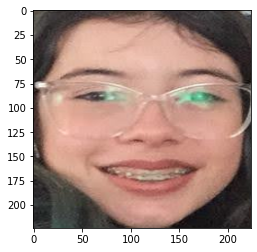

Bristol_Palin: 22.507%
Kalki_Koechlin: 5.363%
Barbara_Goenaga: 3.464%
Gigliola_Cinquetti: 2.664%
Valentina_Cervi: 1.884%


In [24]:
#filename = 'isalie-remi-damien-delphine-franck-maman-papa-3.jpg'
filename = 'isalie-maman-1.jpg'

# load the photo and extract the face
pixels = extract_face(filename)
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

# convert one face into samples
pixels = pixels.astype('float32')

samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    
    print('%s: %.3f%%' % (result[0][3:-1], result[1]*100))


In [25]:
yhat[0]
type(pixels)

numpy.ndarray

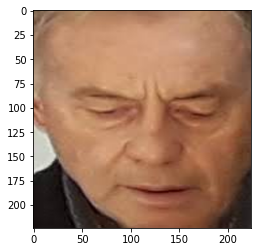

Vincent_Bollor\xc3\xa9: 6.398%
Pedro_Joaqu\xc3\xadn_Coldwell: 5.072%
Antonio_Di_Pietro: 2.288%
Raymond_Blanc: 2.238%
Renato_Casagrande: 2.098%


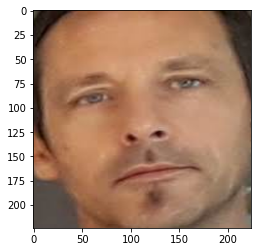

Robin_S\xc3\xb6derling: 13.907%
Rapha\xc3\xabl_Personnaz: 8.053%
Michael_Sheen: 6.648%
David_Hallyday: 3.819%
Hendrik_Duryn: 3.704%


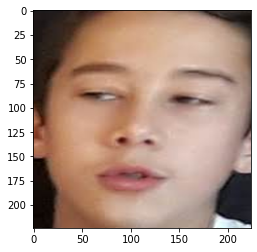

Enchong_Dee: 7.991%
Joem_Bascon: 3.956%
Vivian_Hsu: 2.888%
Rajneesh_Duggal: 2.821%
Takashi_Kashiwabara: 2.675%


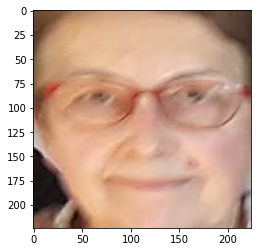

Bettina_Vollath: 47.382%
Christine_Boutin: 3.923%
Nita_Lowey: 3.811%
Bodil_J\xc3\xb8rgensen: 2.318%
Maria_Fekter: 2.061%


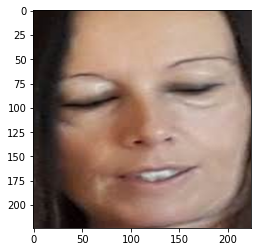

Catherine_Schell: 32.893%
Mar\xc3\xada_Teresa_Campos: 7.173%
Marie_Rottrov\xc3\xa1: 5.529%
Catherine_Spaak: 4.372%
Julia_Gillard: 3.770%


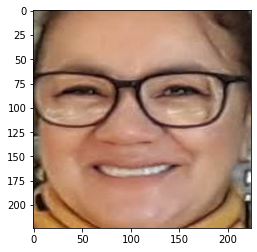

Andrea_Nahles: 19.576%
Rosie_ODonnell: 11.311%
Yolanda_Andrade: 9.536%
Lea_DeLaria: 7.838%
Angelica_Panganiban: 6.651%


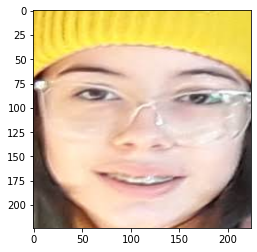

Isha_Sharvani: 44.888%
Sam_Pinto: 4.497%
Jewel_Mische: 3.451%
Maudy_Ayunda: 2.257%
Julia_Montes: 0.997%


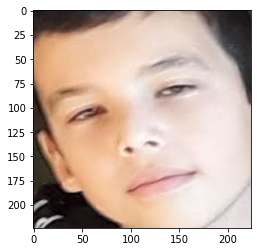

F\xc3\xa1tima_Ptacek: 14.414%
Israel_Broussard: 4.806%
Mackenzie_Foy: 4.235%
Coraima_Torres: 1.984%
Damian_Charles_Hurley: 1.401%


In [26]:
import numpy as np

filename = 'isalie-remi-damien-delphine-franck-maman-papa-3.jpg'
#filename = 'isalie-maman-1.jpg'

# load the photo and extract the face
pixels = extract_faces(filename)

samples = np.array(pixels)

# convert one face into samples
samples = samples.astype('float32')

#samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)

for i in range(yhat.shape[0]):
    # plot the extracted face
    pyplot.imshow(pixels[i])
    # show the plot
    pyplot.show()
    # display most likely results
    for result in results[i]:
        print('%s: %.3f%%' % (result[0][3:-1], result[1]*100))


In [67]:
for i in range(yhat.shape[0]):
    print(i)
    print(yhat[i])

0
[2.4100616e-06 8.7836652e-06 4.5407181e-05 ... 3.1150572e-04 1.3728006e-06
 7.0890695e-05]
1
[2.1714077e-06 5.7625234e-06 3.0327454e-05 ... 3.1387897e-06 3.5479945e-06
 4.0422048e-05]


In [62]:
yhat.shape

(2, 8631)